In [1]:
import pandas as pd
import numpy as np
from get_data import get_track_data

In [2]:
cases_data = pd.read_csv('data/cases.csv')
tracks_data = pd.read_csv('data/trks.csv')
labs_data = pd.read_csv('data/labs.csv')

In [40]:
y = cases_data[cases_data['department'] == 'Urology']

<AxesSubplot:>

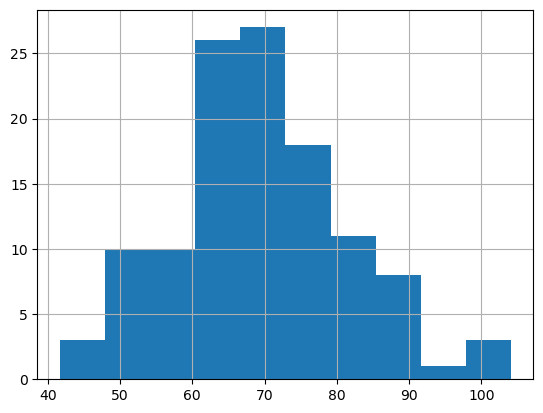

In [53]:
y['weight'].hist()

In [54]:
y['sex']

10      M
40      M
52      M
75      M
143     M
       ..
6177    M
6193    M
6208    M
6215    M
6218    M
Name: sex, Length: 117, dtype: object

<AxesSubplot:>

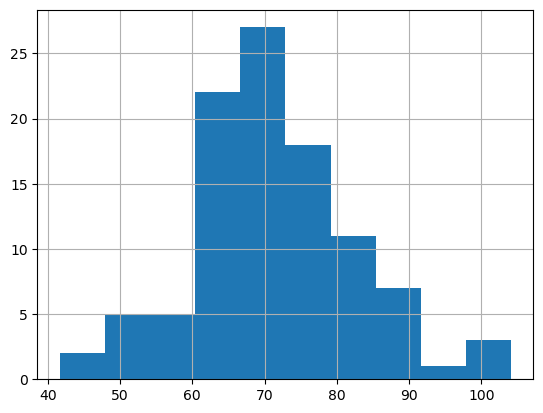

In [57]:
y[y['sex'] == 'M']['weight'].hist()

<AxesSubplot:>

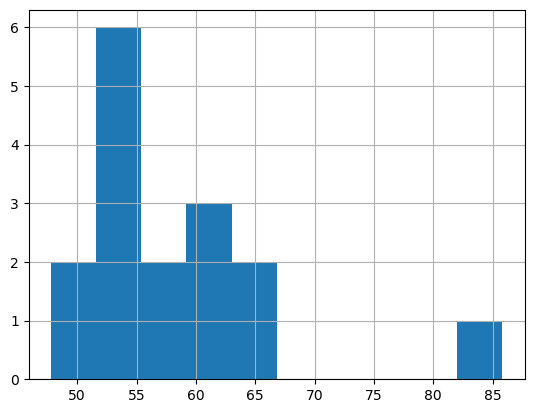

In [58]:
y[y['sex'] == 'F']['weight'].hist()

In [59]:
y[y['sex'] == 'F']

,caseid,subjectid,casestart,caseend,anestart,aneend,opstart,opend,adm,dis,...,intraop_colloid,intraop_ppf,intraop_mdz,intraop_ftn,intraop_rocu,intraop_vecu,intraop_eph,intraop_phe,intraop_epi,intraop_ca
314,315,463,0,4215,-429,3711.0,2571,3171,-142620,30180,...,0,100,0.0,100,45,0,20,0,0,0
848,849,2112,0,5926,-875,5665.0,865,5065,-43800,42600,...,0,120,0.0,50,40,0,10,0,0,0
1161,1162,4751,0,3215,-423,2877.0,1077,1977,-122520,50280,...,0,80,0.0,0,30,0,0,0,0,0
1341,1342,4227,0,3490,-564,3756.0,456,2256,-58344,546456,...,0,90,0.0,100,30,0,5,0,0,0
2781,2782,2112,0,3713,-244,3716.0,1016,2816,-131880,40920,...,0,70,0.0,0,30,0,0,0,0,0
2815,2816,1648,0,2788,-444,2316.0,1416,1716,-131160,41640,...,0,150,0.0,100,30,0,0,0,0,0
3089,3090,1099,0,10047,-703,9797.0,1997,9197,-134160,384240,...,0,80,0.0,0,50,0,0,0,0,150
3123,3124,3215,0,2813,-486,2454.0,954,1554,-115140,57660,...,0,110,0.0,100,50,0,0,0,0,0
3362,3363,2592,0,11377,-1112,11128.0,2788,10228,-136440,381960,...,20,150,0.0,0,50,0,0,0,0,0
4055,4056,2504,0,3484,-299,3601.0,2101,2701,-114540,58260,...,0,100,0.0,50,30,0,10,0,0,0


In [64]:
cases_data.groupby('department')#['los_postop']

In [65]:
cases_data.columns

Index(['caseid', 'subjectid', 'casestart', 'caseend', 'anestart', 'aneend',
       'opstart', 'opend', 'adm', 'dis', 'icu_days', 'death_inhosp', 'age',
       'sex', 'height', 'weight', 'bmi', 'asa', 'emop', 'department', 'optype',
       'dx', 'opname', 'approach', 'position', 'ane_type', 'preop_htn',
       'preop_dm', 'preop_ecg', 'preop_pft', 'preop_hb', 'preop_plt',
       'preop_pt', 'preop_aptt', 'preop_na', 'preop_k', 'preop_gluc',
       'preop_alb', 'preop_ast', 'preop_alt', 'preop_bun', 'preop_cr',
       'preop_ph', 'preop_hco3', 'preop_be', 'preop_pao2', 'preop_paco2',
       'preop_sao2', 'cormack', 'airway', 'tubesize', 'dltubesize', 'lmasize',
       'iv1', 'iv2', 'aline1', 'aline2', 'cline1', 'cline2', 'intraop_ebl',
       'intraop_uo', 'intraop_rbc', 'intraop_ffp', 'intraop_crystalloid',
       'intraop_colloid', 'intraop_ppf', 'intraop_mdz', 'intraop_ftn',
       'intraop_rocu', 'intraop_vecu', 'intraop_eph', 'intraop_phe',
       'intraop_epi', 'intraop_ca'],
     

In [69]:
cases_data.groupby('department')['icu_days'].mean()

department
General surgery     0.497566
Gynecology          0.073913
Thoracic surgery    0.950495
Urology             0.042735
Name: icu_days, dtype: float64

In [71]:
cases_data.groupby(['department', 'approach'])['icu_days'].mean()

department        approach   
General surgery   Open           0.710052
                  Robotic        0.096296
                  Videoscopic    0.139562
Gynecology        Open           0.169231
                  Robotic        0.000000
                  Videoscopic    0.042857
Thoracic surgery  Open           2.615789
                  Robotic        0.750000
                  Videoscopic    0.601800
Urology           Open           0.333333
                  Robotic        0.038961
                  Videoscopic    0.000000
Name: icu_days, dtype: float64

In [73]:
cases_data.columns

Index(['caseid', 'subjectid', 'casestart', 'caseend', 'anestart', 'aneend',
       'opstart', 'opend', 'adm', 'dis', 'icu_days', 'death_inhosp', 'age',
       'sex', 'height', 'weight', 'bmi', 'asa', 'emop', 'department', 'optype',
       'dx', 'opname', 'approach', 'position', 'ane_type', 'preop_htn',
       'preop_dm', 'preop_ecg', 'preop_pft', 'preop_hb', 'preop_plt',
       'preop_pt', 'preop_aptt', 'preop_na', 'preop_k', 'preop_gluc',
       'preop_alb', 'preop_ast', 'preop_alt', 'preop_bun', 'preop_cr',
       'preop_ph', 'preop_hco3', 'preop_be', 'preop_pao2', 'preop_paco2',
       'preop_sao2', 'cormack', 'airway', 'tubesize', 'dltubesize', 'lmasize',
       'iv1', 'iv2', 'aline1', 'aline2', 'cline1', 'cline2', 'intraop_ebl',
       'intraop_uo', 'intraop_rbc', 'intraop_ffp', 'intraop_crystalloid',
       'intraop_colloid', 'intraop_ppf', 'intraop_mdz', 'intraop_ftn',
       'intraop_rocu', 'intraop_vecu', 'intraop_eph', 'intraop_phe',
       'intraop_epi', 'intraop_ca'],
     

In [74]:
cases_data['intraop_ebl']

0          NaN
1         50.0
2          NaN
3          NaN
4       2600.0
         ...  
6383     100.0
6384     100.0
6385     100.0
6386       NaN
6387       NaN
Name: intraop_ebl, Length: 6388, dtype: float64

In [79]:
cases_data['age'].isna().mean()

0.0

In [ ]:
visualization idea 1: Open Surgical approach sucks

visuliazation idea 2: 

In [85]:
# Define age bins
age_bins = [0, 20, 40, 60, 80, 100]
age_labels = ['0-20', '21-40', '41-60', '61-80', '81-100']

# Create a new column for age bins
cases_data['age_bin'] = pd.cut(cases_data['age'], bins=age_bins, labels=age_labels, right=False)

# Calculate mortality rate and average ICU days for each age bin
# age_bin_stats = cases_data.groupby('age_bin').agg(
#     mortality_rate=('death_inhosp', 'mean'),
#     average_icu_days=('icu_days', 'mean')
# ).reset_index()

# print(age_bin_stats)
# Further categorize data based on department kind
department_kind_stats = cases_data.groupby(['age_bin', 'department']).agg(
    mortality_rate=('death_inhosp', 'count'),
    average_icu_days=('icu_days', 'mean')
).reset_index()

print(department_kind_stats)
print('---------------------------')
department_kind_stats = cases_data.groupby(['age_bin', 'department']).agg(
    mortality_rate=('death_inhosp', 'mean'),
    average_icu_days=('icu_days', 'mean')
).reset_index()

print(department_kind_stats)

   age_bin        department  mortality_rate  average_icu_days
0     0-20   General surgery              67          7.059701
1     0-20        Gynecology               4          0.000000
2     0-20  Thoracic surgery              22          0.227273
3     0-20           Urology               2          0.000000
4    21-40   General surgery             556          0.199640
5    21-40        Gynecology              80          0.012500
6    21-40  Thoracic surgery              84          0.130952
7    21-40           Urology               4          0.000000
8    41-60   General surgery            1965          0.374555
9    41-60        Gynecology             108          0.064815
10   41-60  Thoracic surgery             383          0.485640
11   41-60           Urology              33          0.030303
12   61-80   General surgery            2126          0.383349
13   61-80        Gynecology              37          0.243243
14   61-80  Thoracic surgery             590          1